# Introduction
This is the data wrangling and EDA for the capstone project.

In [1]:
import pandas as pd
import numpy as np
import json
from functools import reduce
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [7]:
l = list()
with open("arxiv-metadata-oai-snapshot.json", 'r',1) as f:
    """The data file is too large to open directly, but if we go through it line by line
    we can append the desired data into a list that we can hold in memory"""
    for line in f:
          d = json.loads(line)
          ap = dict()
          ap['id'] = d['id']
          ap['categories'] = d['categories']
          ap['title'] = d['title']
          ap['abstract'] = d['abstract']
          l.append(ap)

In [9]:
df = pd.DataFrame(l)

In [10]:
df.head()

,id,categories,title,abstract
0,0704.0001,hep-ph,Calculation of prompt diphoton production cros...,A fully differential calculation in perturba...
1,0704.0002,math.CO cs.CG,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-..."
2,0704.0003,physics.gen-ph,The evolution of the Earth-Moon system based o...,The evolution of Earth-Moon system is descri...
3,0704.0004,math.CO,A determinant of Stirling cycle numbers counts...,We show that a determinant of Stirling cycle...
4,0704.0005,math.CA math.FA,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,In this paper we show how to compute the $\L...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931777 entries, 0 to 1931776
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          object
 1   categories  object
 2   title       object
 3   abstract    object
dtypes: object(4)
memory usage: 59.0+ MB


In [13]:
df.isna().sum() #Check for null values

id            0
categories    0
title         0
abstract      0
dtype: int64

In [11]:
df.to_csv('selected_columns.csv', index=False)#Save pruned data into a csv to retrieve later.

## Do not run Cells Before this one
From only cells after this one should be run

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('selected_columns.csv')

In [3]:
df['id'] = df['id'].apply(str) #to ensure unique ids

In [5]:
df = (df.loc[~df.id.duplicated()]) #eliminate duplicates.

In [6]:
#after attempting to run cells in this notebook several times, I've concluded I need to trim
#down the dataset. I've decided to use train_test_split to randomly select 10% of the data
#which is pretty drastic, but since I have a deadline, I decided it was best to drastically 
#cut back on the amount of data and be able to process it than do something more reasonable
#and risk crashing again. With the initial data set containing nearly 2,000,000 entries 10%
#is still enough for meanful model evaluation. This unfortunately means I'll have to 
#remake the corpus, but that should be significantly faster this time.
used_df = train_test_split(df, train_size=0.1)[0]
used_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193177 entries, 183512 to 854627
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          193177 non-null  object
 1   categories  193177 non-null  object
 2   title       193177 non-null  object
 3   abstract    193177 non-null  object
dtypes: object(4)
memory usage: 7.4+ MB


In [10]:
#This looks good, so I'm going to save it to a csv for consisstency later
used_df.to_csv("selected_rows.csv", index=False)

In [4]:
df = pd.read_csv("selected_rows.csv",)

In [3]:
df.head()

,id,categories,title,abstract
0,1004.1572,cond-mat.mes-hall quant-ph,Finite-frequency counting statistics of electr...,We present a theory of frequency-dependent c...
1,1809.02862,cs.IR cs.CY,A survey of food recommenders,"Everyone eats. However, people do not always..."
2,804.414,physics.optics,Coupled-resonator-induced reflection in photon...,We study the resonant transmission of light ...
3,2004.05464,math.CT,Descent cospans for the fibration of points,Draft version of a paper concerning an inter...
4,hep-ph/0509060,hep-ph,Spectroscopy of Pentaquark Baryons,A review is given to pentaquark mass predict...


In [13]:
for t, a in zip(df['id'], df['abstract']):
    t = t.replace('\n', '')
    t = t.replace('\\', '')
    t = t.replace('"', '')
    t = t.replace('<', '')
    t = t.replace('>', '')
    t = t.replace('?', '')
    t = t.replace('*', '')
    t = t.replace('^', '')
    t = t.replace('/', 'or')
    t = t.replace('|', '')
    t = t.replace(':', '')
    t = t.replace("'", '')
    t = t.replace('+', 'plus')
    t = t.replace('=', 'equal')
    t = t.replace(' ', '')
    t = t.replace('$', '')
    with open('data\\corpus\\'+t+'.txt',  'w', encoding='utf-8') as f:
        f.write(a)
        #print(len(t.split()))

In [5]:
def get_file_name(title):
    """Returns the filename of the file in the corpus for a specified paper title. 
    It does this by applying the modifications that were done to make the file in the firstplace.
    It does not check to see if the file actually exists."""
    t = title.replace('\n', '')
    t = t.replace('\\', '')
    t = t.replace('"', '')
    t = t.replace('<', '')
    t = t.replace('>', '')
    t = t.replace('?', '')
    t = t.replace('*', '')
    t = t.replace('^', '')
    t = t.replace('/', 'or')
    t = t.replace('|', '')
    t = t.replace(':', '')
    t = t.replace("'", '')
    t = t.replace('+', '-plus')
    t = t.replace('=', 'equal')
    t = t.replace(' ', '')
    t = t.replace('$', '')
    return 'data\\corpus\\'+t+'.txt'

In [6]:
dr = "data\\corpus\\"
corpus = PlaintextCorpusReader(dr, '.*')

In [7]:
from nltk.corpus import stopwords
from string import punctuation

In [17]:
type(corpus.words())

nltk.corpus.reader.util.ConcatenatedCorpusView

In [18]:
len(corpus.words())

32362926

In [8]:
sw = stopwords.words('english')

In [9]:
cp = [w.lower() for w in corpus.words() if w.lower() not in sw]
#len(cp)

In [10]:
cp_np = [w.lower() for w in cp if w.lower() not in punctuation]

In [11]:
#len(cp_np), len(set(cp_np))
import re
pat = re.compile('[^a-zA-Z]')
cp_set = set(cp_np)
cp_final_set = set([pat.sub('', w) for w in cp_set])
cp_final = list(cp_final_set)
cp_final.remove('')
len(cp_final)

143307

In [12]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
cp_final_set = set([ps.stem(w) for w in cp_final])
cp_final = list(cp_final_set)
len(cp_final)

107599

In [13]:
def corpify(text):
    """This function takes a text input an converts it to a form where 
    it has the has only the words recognized by the corpus. That is, it only has words 
    in cp_final. Only works for documents in the corpus
    Must have defined punctuation and sw globally, and imported re"""
    words = [w.lower() for w in corpus._word_tokenizer.tokenize(text) if w.lower() not in sw]
    words_np = [w.lower() for w in words if w.lower() not in punctuation]
    pat = re.compile('[^a-zA-Z]')
    #ps = PorterStemmer()
    words_final = [(pat.sub('', w)) for w in words_np if pat.sub('',w)!='']
    words_final = list(map(ps.stem, words_final))
    return words_final

def dictify(words):
    return (dict(list(np.array(np.unique(words,return_counts=True)).transpose())))

# Reducing Categories
There are too many categories to expect reasonable performance. The easiest way to generalize these categories accurately is to use arxiv's own subcategory system. A category and its subcategory are separated by a '.' so if we remove everthing after the period in each category we will get a more general category that more papers will belong to.

In [14]:
#df = pd.read_csv("selected_rows.csv")
df.categories = df.categories.str.split()
#df.head()
def generalized_cats(cats):
    """Remove subcategory information from a set of categories in order 
    to reduce the total number of categories present in the data"""
    return list(set(map(lambda y: y.split('.')[0], cats)))
df.categories = df.categories.apply(generalized_cats)
s = set()
for l in np.unique(df.categories):
    s = s.union(set(l))
len(s) #should be 38

38

In [15]:
from collections import defaultdict
m = list()
for i in range(len(df)):
    d = defaultdict(lambda : 0)#, _id = df.iloc[i].id)
    for k in s:
        d['_'+k] = int(k in df.iloc[i].categories)
    ab = dictify(corpify(df.iloc[i].abstract))
    for k in ab.keys():
        d[k] = ab[k]
    m.append(d)

In [16]:
dv = DictVectorizer()
mat = dv.fit_transform(m)
col_dict = dict([(v,k) for k,v in dv.vocabulary_.items()])
cols = [col_dict[i] for i in range(len(col_dict))]
sp_df = pd.DataFrame.sparse.from_spmatrix(mat, columns = cols)

In [20]:
sp_df.sparse.density

0.00048811985163166153

In [50]:
#Look less than one-twentieth of a percent of our data is non-zero!

In [21]:
sp_df.head()

,_acc-phys,_adap-org,_alg-geom,_ao-sci,_astro-ph,_atom-ph,_bayes-an,_chao-dyn,_chem-ph,_cmp-lg,...,zzn=2,zzq=5,zzr=1,zzstar=1,zzt=1,zzw=1,zzz=1,zzz=2,zzz=5,zzzjzzz=1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193177 entries, 0 to 193176
Columns: 199817 entries, _acc-phys to zzzjzzz=1
dtypes: Sparse[float64, 0](199817)
memory usage: 215.6 MB


In [2]:
sp_df = pd.read_pickle('sparsedf.pkl')#Yay!!! It works!!!

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
#train, test = train_test_split(sp_df, test_size=0.2)
#y_train, y_test = train.filter(regex="^_", axis=1), test.filter(regex="^_", axis=1)
#X_train, X_test = train.drop(y_test.columns, axis=1), test.drop(y_test.columns, axis=1)
#clf = MultinomialNB() was going to do this, but had to 

In [4]:
from imblearn.over_sampling import RandomOverSampler #We know we need to oversample

In [5]:
presence = sp_df[y_train.columns].sum()

In [46]:
len(presence)

38

In [49]:
from sklearn.experimental import enable_hist_gradient_boosting#
from sklearn.ensemble import HistGradientBoostingClassifier#Does not work with sparse data

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier(random_state=0, max_features='log2', n_iter_no_change=10)
gbc.fit(X_train, y_train.iloc[:,4])

GradientBoostingClassifier(max_features='log2', n_iter_no_change=10,
                           random_state=0)

In [63]:
f1_score(gbc.predict(X_test), y_test.iloc[:,4])

0.0037839697282421743

In [58]:
y_test.columns[4]

'_astro-ph'

In [39]:
droppable = list()
for col in presence.index:
    if (presence[col]<presence.quantile(0.40)):# and 'ph' in col):
        droppable.append(presence[col])
len(droppable)

15

In [44]:
presence.sort_values()

_bayes-an        1.0
_ao-sci          3.0
_plasm-ph        5.0
_acc-phys       10.0
_comp-gas       19.0
_atom-ph        19.0
_chem-ph        20.0
_supr-con       21.0
_funct-an       30.0
_mtrl-th        32.0
_adap-org       53.0
_dg-ga          74.0
_patt-sol       74.0
_cmp-lg        102.0
_alg-geom      153.0
_solv-int      154.0
_q-alg         175.0
_chao-dyn      231.0
_econ          417.0
_q-fin        1374.0
_nucl-ex      2121.0
_hep-lat      2432.0
_q-bio        3441.0
_nlin         3675.0
_eess         3915.0
_hep-ex       4478.0
_nucl-th      4987.0
_math-ph      6680.0
_gr-qc        8845.0
_stat         9073.0
_quant-ph    11483.0
_hep-th      14690.0
_hep-ph      15913.0
_physics     19651.0
_astro-ph    29194.0
_cond-mat    31463.0
_cs          37332.0
_math        51296.0
dtype: float64

In [59]:
col_map = {'_bayes-an' : '_math',
'_ao-sci' : '_physics',
'_plasm-ph' : '_physics',
'_acc-phys' : '_physics',
'_comp-gas' : '_physics',
'_atom-ph' : '_physics',
'_chem-ph' : '_physics',
'_supr-con' : '_physics',
'_funct-an' : '_math',
'_mtrl-th' : '_physics',
'_dg-ga' : '_math',
'_patt-sol' : '_physics',
'_cmp-lg' : '_cs',
'_alg-geom' : '_math', 
'_solv-int' : '_math',   
'_q-alg' : '_math',
'_chao-dyn' : '_math'}

In [61]:
(y_train.iloc[:4,1]).apply(lambda x: min(x, 1))

120602    0.0
183804    0.0
159152    0.0
100475    0.0
Name: _adap-org, dtype: Sparse[float64, 0]

In [ ]:
for col in col_map.keys():
    sp_df[col_map[col]] = (so_dfsp_df[col_map[col]]+so_dfsp_df[col]).apply(lambda x: min(x, 1))

In [22]:
sp_df = sp_df[~sp_df.index.duplicated(keep='first')] #eliminate duplicates (just in case)
y = sp_df.filter(regex="^_", axis=1) 
X = sp_df.drop(y.columns, axis=1)

In [20]:
from scipy.sparse import csr_matrix
from imblearn.over_sampling import SMOTE 
#I actually have no grounds for using SMOTE over naive sampling, but am trying to avoid an error

In [30]:
pd.DataFrame(y.iloc[:,0]).sparse.to_coo()

<193177x1 sparse matrix of type '<class 'numpy.float64'>'
	with 53 stored elements in COOrdinate format>

In [35]:
X.shape[0]*X.shape[1]

38592707883

In [48]:
med = y.sum().median()

In [67]:
med

6680.0

In [73]:
y.sum().sort_values()

_adap-org       53.0
_econ          417.0
_q-fin        1374.0
_nucl-ex      2121.0
_hep-lat      2432.0
_q-bio        3441.0
_nlin         3675.0
_eess         3915.0
_hep-ex       4478.0
_nucl-th      4987.0
_math-ph      6680.0
_gr-qc        8845.0
_stat         9073.0
_quant-ph    11483.0
_hep-th      14690.0
_hep-ph      15913.0
_physics     19871.0
_astro-ph    29194.0
_cond-mat    31463.0
_cs          37332.0
_math        51626.0
dtype: float64

In [74]:
from random import sample
models = dict()
tscores = dict()

for col in y.columns:
    if y.sum()[col]<med:
        s = sample(range(len(X)), k=min(30000, 10*int(y.sum()[col])))
        s.extend(sp_df[sp_df[y.columns[0]]==1].index)
        X_train, X_test, y_train, y_test = train_test_split(X.iloc[s], y.iloc[s], test_size=0.2)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    nb = MultinomialNB()
    grad = GradientBoostingClassifier(n_iter_no_change=5)
    nb.fit(X_train, y_train[col])
    grad.fit(X_train, y_train[col])
    ns = f1_score(nb.predict(X_test), y_test[col])
    gs = f1_score(grad.predict(X_test), y_test[col])
    if ns < gs:
        models[col] = grad
        tscores[col] = gs
    else:
        models[col] = nb
        tscores[col] = ns
        
for key in models.keys():
    print(key, models[key], tscores[key])

_adap-org MultinomialNB() 0.0
_astro-ph MultinomialNB() 0.8925676840834627
_cond-mat MultinomialNB() 0.7942148153586374
_cs MultinomialNB() 0.8282528762898826
_econ MultinomialNB() 0.0
_eess GradientBoostingClassifier(n_iter_no_change=5) 0.04724409448818897
_gr-qc MultinomialNB() 0.6378132118451024
_hep-ex GradientBoostingClassifier(n_iter_no_change=5) 0.31
_hep-lat GradientBoostingClassifier(n_iter_no_change=5) 0.2702702702702703
_hep-ph MultinomialNB() 0.7257037770547462
_hep-th MultinomialNB() 0.6220366379310345
_math MultinomialNB() 0.8300718006476138
_math-ph MultinomialNB() 0.198542172856647
_nlin GradientBoostingClassifier(n_iter_no_change=5) 0.07874015748031497
_nucl-ex GradientBoostingClassifier(n_iter_no_change=5) 0.32941176470588235
_nucl-th GradientBoostingClassifier(n_iter_no_change=5) 0.3278688524590164
_physics MultinomialNB() 0.5181849670938691
_q-bio GradientBoostingClassifier(n_iter_no_change=5) 0.20740740740740743
_q-fin GradientBoostingClassifier(n_iter_no_change=5)

In [75]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #is this valid? Actually, forget this we'll look at everything
scores = dict()
for key in models.keys():
    scores[key] = f1_score(models[key].predict(X), y[key])
scores

{'_adap-org': 0.0,
 '_astro-ph': 0.8999259985888103,
 '_cond-mat': 0.811612468308982,
 '_cs': 0.8423030758598951,
 '_econ': 0.0,
 '_eess': 0.09893522626441881,
 '_gr-qc': 0.6692316526932353,
 '_hep-ex': 0.3291702309666381,
 '_hep-lat': 0.29521016617790813,
 '_hep-ph': 0.7407469482387776,
 '_hep-th': 0.6543567006407309,
 '_math': 0.8487824727871338,
 '_math-ph': 0.26594594594594595,
 '_nlin': 0.07064803049555272,
 '_nucl-ex': 0.27352653858677956,
 '_nucl-th': 0.31263650546021843,
 '_physics': 0.5891908059728966,
 '_q-bio': 0.29749501219241853,
 '_q-fin': 0.37428445618670186,
 '_quant-ph': 0.667883581786837,
 '_stat': 0.5106187821914909}

In [77]:
to_avg = [scores[key] for key in scores.keys()]
sum(to_avg)/len(to_avg)

0.4548811713973987

In [49]:
scores

[('_acc-phys', 0.0),
 ('_adap-org', 0.0),
 ('_alg-geom', 0.04),
 ('_ao-sci', 0.0),
 ('_astro-ph', 0.8933712610981812),
 ('_atom-ph', 0.0),
 ('_bayes-an', 0.0),
 ('_chao-dyn', 0.0),
 ('_chem-ph', 0.0),
 ('_cmp-lg', 0.0),
 ('_comp-gas', 0.0),
 ('_cond-mat', 0.7992508823741267),
 ('_cs', 0.8299344501092499),
 ('_dg-ga', 0.0),
 ('_econ', 0.0202020202020202),
 ('_eess', 0.31903945111492277),
 ('_funct-an', 0.0),
 ('_gr-qc', 0.6105698258045468),
 ('_hep-ex', 0.5293150684931507),
 ('_hep-lat', 0.11307420494699645),
 ('_hep-ph', 0.7246745897000565),
 ('_hep-th', 0.6239719563165701),
 ('_math', 0.8433443446703578),
 ('_math-ph', 0.17985853822835973),
 ('_mtrl-th', 0.0),
 ('_nlin', 0.07159904534606205),
 ('_nucl-ex', 0.15503875968992248),
 ('_nucl-th', 0.39268292682926825),
 ('_patt-sol', 0.0),
 ('_physics', 0.5302474793767186),
 ('_plasm-ph', 0.0),
 ('_q-alg', 0.0),
 ('_q-bio', 0.33540372670807456),
 ('_q-fin', 0.030581039755351685),
 ('_quant-ph', 0.615702479338843),
 ('_solv-int', 0.0),
 ('_s

In [47]:
#Don't know if this is actually valid, but an average f1_score accross classes gives us a
#reference for the model
sum(list(map(lambda x: x[1], scores)))/38 #Average f1_score of the 38 NaiveBayes models

0.24029533436422335

Some of the component models do very well, but on average Naive Bayes modeling is not doing a very good job of predicting the categories of our abstracts. For now we will save the data frame in a pickle file instead of a csv because I have concerns about maintaining the sparse qualities of the object if I use the csv file.

In [48]:
sp_df.to_pickle("sparsedf.pkl")

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=1000, max_features='log2')
rfc.fit(X_train, y_train.iloc[:,0])

RandomForestClassifier(max_features='log2', n_estimators=1000)

In [ ]:
"""rfcs = list()
for i in range(len(y_train.columns)):
    rfc = RandomForestClassifier(n_estimators=100, max_features='log2')
    rfc.fit(X_train, y_train.iloc[:,i])
    rfcs.append(rfc)"""#Uses too much memory

In [ ]:
rfc_scores = list()
for i, rfc in enumerate(rfcs):
    rfc_scores.append((y_test.columns[i], f1_score(rfc.predict(X_test), y_test.iloc[:,i])))

In [ ]:
rfc_scores

In [ ]:
sum(list(map(lambda x: x[1], rfc_scores)))/38

# Reducing Categories
There are too many categories to expect reasonable performance. The easiest way to generalize these categories accurately is to use arxiv's own subcategory system. A category and its subcategory are separated by a '.' so if we remove everthing after the period in each category we will get a more general category that more papers will belong to.

In [15]:
def generalized_cats(cats):
    """Remove subcategory information from a set of categories in order 
    to reduce the total number of categories present in the data"""
    return list(set(map(lambda y: y.split('.')[0], cats)))
df.categories = df.categories.apply(generalized_cats)
s = set()
for l in np.unique(df.categories):
    s = s.union(set(l))
len(s) #should be 38

38

As we can see, we now have a much more managable list of categories for classification. We could group categories together and reduce the total number of them further, but we won't trouble ourselves with that for the time being.

In [91]:
df.categories

0                      [hep-ph]
1                    [math, cs]
2                     [physics]
3                        [math]
4                        [math]
                   ...         
1931772    [supr-con, cond-mat]
1931773    [supr-con, cond-mat]
1931774    [supr-con, cond-mat]
1931775    [supr-con, cond-mat]
1931776    [supr-con, cond-mat]
Name: categories, Length: 1931777, dtype: object

In [101]:
is_d = dict()
for key in new_d.keys():
    if new_d[key][2] < new_d[key][0]+new_d[key][1]:
        continue
    is_d[key] = new_d[key]
len(new_d)-38

836

In [52]:
import networkx as nx

In [53]:
g = dict()
for key in s:
    g[key] = []
    for r in df.categories:
        if key in r:
            for k in r:
                g[key].append(k)
        g[key] = list(set(g[key]))
    g[key] = list(set(g[key]).difference(set([key])))


In [54]:
gr = nx.Graph(g)

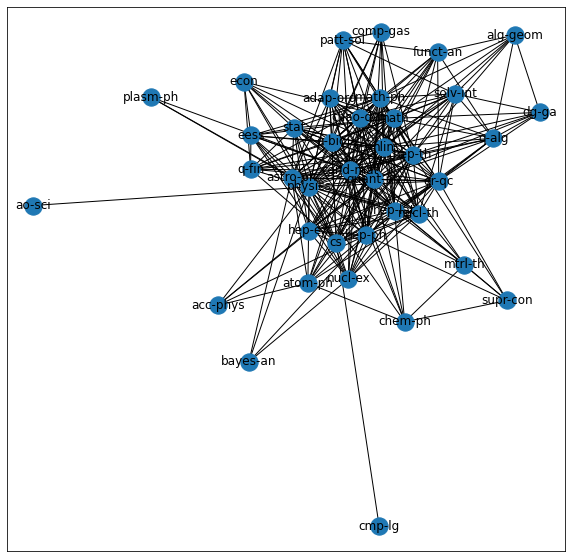

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(gr, with_labels=True)

In [66]:
min([(t[0], len(t[1])) for t in gr.adjacency()])

('acc-phys', 5)

In [30]:
df.tail()

,id,categories,title,abstract
193172,911.0642,math.MG math.FA,On the Homothety Conjecture,Let $K$ be a convex body in $\bbR^n$ and $\d...
193173,1410.3737,math.AP,The factorization method for a defective regio...,In this paper we consider the inverse acoust...
193174,2001.02437,math.NT,On the irreducible factors of a polynomial II,We give a lower bound for the degree of an i...
193175,708.2303,cs.AI cs.CL,Compositional Semantics Grounded in Commonsens...,We argue for a compositional semantics groun...
193176,1705.1108600000002,physics.optics nlin.PS,The multi-resonant Lugiato-Lefever model,We introduce a new model describing multiple...


In [29]:
cats = df.categories.apply(lambda x: x.split())
cats.head()

0    [cond-mat.mes-hall, quant-ph]
1                   [cs.IR, cs.CY]
2                 [physics.optics]
3                        [math.CT]
4                         [hep-ph]
Name: categories, dtype: object

In [26]:
cat_set = reduce(lambda x, y: x.union(y), np.unique(df.categories.apply(lambda x: x.split())), set())

In [27]:
cat_set
len(set(map(lambda x: x.split('.')[0], cat_set)))

38

In [28]:
cat_set

{'acc-phys',
 'adap-org',
 'alg-geom',
 'ao-sci',
 'astro-ph',
 'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'atom-ph',
 'bayes-an',
 'chao-dyn',
 'chem-ph',
 'cmp-lg',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'dg-ga',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'funct-an',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'm

In [9]:
len(cats)

176

In [15]:
cat_series = df.categories.apply(lambda x: len(x.split()))
(cat_series == 1).sum(), len(cat_series)

(1086078, 1931777)

In [21]:
master_cats = set(df.categories.apply(lambda x: (x.split()))[cat_series==1].apply(lambda x: x[0]))

In [49]:
cats_series = df.categories.apply(lambda x: (x.split()))
d = defaultdict(lambda :  0)
for cat in master_cats:
    d[cat] = cats_series.apply(lambda x: cat in set(x)).sum()
d

defaultdict(<function __main__.<lambda>()>,
            {'q-fin.ST': 2821,
             'physics.gen-ph': 9580,
             'cs.HC': 8386,
             'nucl-ex': 22008,
             'cs.OH': 2045,
             'cs.NE': 9902,
             'math.HO': 2882,
             'q-fin.GN': 2249,
             'gr-qc': 89243,
             'cs.SY': 17511,
             'math.AP': 47183,
             'math.RT': 21252,
             'math.CA': 18370,
             'math.SG': 7626,
             'cs.SE': 9685,
             'math.AG': 43653,
             'physics.plasm-ph': 12712,
             'physics.space-ph': 4659,
             'cs.MA': 4504,
             'stat.AP': 12796,
             'cond-mat.supr-con': 37548,
             'nlin.SI': 10508,
             'physics.ao-ph': 4624,
             'q-bio.OT': 1025,
             'q-bio.CB': 1837,
             'nlin.AO': 5962,
             'astro-ph.CO': 55473,
             'eess.IV': 11083,
             'cond-mat.dis-nn': 20009,
             'cond-mat.soft':

In [41]:
dict(d)

{'q-fin.ST': 2821,
 'physics.gen-ph': 9580,
 'cs.HC': 8386,
 'nucl-ex': 22008,
 'cs.NE': 9902,
 'cs.OH': 2045,
 'math.HO': 2882,
 'q-fin.GN': 2249,
 'gr-qc': 89243,
 'cs.SY': 17511,
 'math.AP': 47183,
 'math.RT': 21252,
 'math.CA': 18370,
 'math.SG': 7626,
 'cs.SE': 9685,
 'math.AG': 43653,
 'physics.plasm-ph': 12712,
 'physics.space-ph': 4659,
 'cs.MA': 4504,
 'bayes-an': 16,
 'stat.AP': 12796,
 'cond-mat.supr-con': 37548,
 'nlin.SI': 10508,
 'physics.ao-ph': 4624,
 'ao-sci': 17,
 'q-bio.OT': 1025,
 'q-bio.CB': 1837,
 'nlin.AO': 5962,
 'astro-ph.CO': 55473,
 'eess.IV': 11083,
 'cond-mat.dis-nn': 20009,
 'cond-mat.soft': 33096,
 'q-fin.EC': 2407,
 'math.CT': 6503,
 'eess.AS': 6153,
 'cs.DM': 10370,
 'cs.IR': 10009,
 'cs.CY': 10901,
 'q-fin.TR': 1326,
 'hep-th': 145712,
 'cs.DS': 17993,
 'hep-ph': 158716,
 'physics.flu-dyn': 20183,
 'math.OA': 10681,
 'nlin.PS': 8222,
 'comp-gas': 221,
 'q-bio.BM': 4285,
 'cs.AI': 36918,
 'math.DG': 34945,
 'cs.AR': 2457,
 'cs.GT': 7814,
 'math.ST': 173